In [23]:
# Modules that we need
from Vissim_env_class import environment, Load_Vissim
from MasterAC_Agent import MasterAC_Agent
from MasterDQN_Agent import MasterDQN_Agent

# General Libraries
import numpy as np 
import pylab as plt
import os
import csv
import pandas as pd
import json


%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
vissim \
= \
Load_Vissim(
Path_to_network = 'C:\\Users\\nwalton\\OneDrive - The Alan Turing Institute\\Documents\\MLforFlowOptimisation\\NSW_Single_Cross_Experiment\\Single_Cross_Straight\\',\
inpx_Filename = 'Single_Cross_Straight.inpx',\
layx_Filename = 'Single_Cross_Straight.layx',\
attempts=5
)

fail
success


# Single Cross AC 

In [71]:
model_name  = 'Single_Cross_Straight'
vissim_working_directory=\
'C:\\Users\\nwalton\\OneDrive - The Alan Turing Institute\
\\Documents\\MLforFlowOptimisation\\NSW_Single_Cross_Experiment\\'

#vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
sim_length = 3601

agent_type = "AC"
Session_ID = "Single_Cross_Straigth_AC"



# all controller actions
Single_Cross_Straight_dictionary =\
{'junctions' : {
    # Controller Number 0 
    0 : {'default_actions' : {     0 : [1, 0, 1, 0],
                                     1 : [0, 1, 0, 1]
        },
         
         'all_actions' : {     0 : [1, 0, 1, 0],
                                     1 : [0, 1, 0, 1]
        },
 
         'link' : [1, 3, 5, 7],
         'lane' : ['1-1', '3-1', '5-1', '7-1'],
         'agent_type' : agent_type,
         'controled_by_com' : True,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [5],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues',
        'queues_counter_ID' : [1,2,3,4]}
        },
 'demand' : { 'default' : [800, 800, 800, 800],
             
             0 : [200,200,200,200],
             1 : [400,400,400,400],
             2 : [900,500,900,500],
             3 : [1000,500,1000,500],
             4 : [700,500,700,500],
             5 : [500,700,500,700],
             6 : [500,1000,500,1000],
             7 : [500,900,500,900],
             8 : [400,400,400,400],
             9 : [200,200,200,200]
            }
 
}

In [72]:
gamma = 0.95
alpha = 0.00001


value = 0.5
entropy = 0.5
n_step_size = 16
state_size = [5]
reduce_entropy_every = 100
Random_Seed = 1

# for the monitoring
horizon = 50
n_sample = 10

In [73]:
Single_Cross_Straight_MultiAC_Agents\
= MasterAC_Agent(model_name, 
                 vissim_working_directory, 
                 sim_length, 
                 Single_Cross_Straight_dictionary,
                 n_step_size, 
                 gamma, alpha, entropy, value,
                 Random_Seed = Random_Seed, 
                 timesteps_per_second = 1, 
                 Session_ID = Session_ID, 
                 verbose = True, \
                 horizon = horizon, n_sample = n_sample,
                save_location = 'C:\\Users\\nwalton\\OneDrive - The Alan Turing Institute\\Desktop')


Deploying instance of Actor_Critic Agent(s) !!! TENSORFLOW 2 IS NEEDED !!! 
Model: "model2_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
value1 (Dense)               multiple                  288       
_________________________________________________________________
value2 (Dense)               multiple                  1176      
_________________________________________________________________
value (Dense)                multiple                  25        
_________________________________________________________________
policy_logits1 (Dense)       multiple                  288       
_________________________________________________________________
policy_logits2 (Dense)       multiple                  1176      
_________________________________________________________________
policy_logits (Dense)        multiple                  50        
________________________________________________

In [9]:
Single_Cross_Straight_MultiAC_Agents.train(100,vissim=vissim) 

Random seed set in simulator. Random Seed = 100
Deploying Network Parser...
Successful Network Crawl: Identified SignalControllers, Links, Lanes and Vehicle Inputs.

Setting Simulation mode to: training
Starting Deployments of Signal Control Units...
SCUs successfully deployed. Elapsed time 0.1 seconds.



W1024 16:11:56.002338 21752 deprecation.py:323] From C:\Users\nwalton\.conda\envs\tf2\lib\site-packages\tensorflow_core\python\keras\optimizer_v2\optimizer_v2.py:460: BaseResourceVariable.constraint (from tensorflow.python.ops.resource_variable_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Apply a constraint manually following the optimizer update step.


Random Seed Set to 101
Episode 1 is finished
Agent 0 : Predicted Values and True Return : 
 [-46.0, -46.0, -30.0, -46.0, -46.0, -46.0, -46.0, -46.0, -46.0, -46.0] 
 [-9473.0, -9473.0, -8675.0, -9473.0, -9473.0, -9473.0, -9473.0, -9473.0, -9473.0, -9473.0]
Agent 0 : Proba distribution on those states : 
 [[1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0]]
Agent 0 : Proba distribution on the 0 state : 
 [0.5 0.5]
Average Reward for Agent 0 this episode : -489.18
Saving architecture, weights, optimizer state for best agent-0
Random Seed Set to 102
Episode 2 is finished
Agent 0 : Predicted Values and True Return : 
 [-70.0, -70.0, -70.0, -70.0, -70.0, -70.0, -70.0, -70.0, -70.0, -70.0] 
 [-9424.0, -9424.0, -9424.0, -9424.0, -9424.0, -9424.0, -9424.0, -9424.0, -9424.0, -9424.0]
Agent 0 : Proba distribution on those states : 
 [[1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [

Random Seed Set to 116
Episode 16 is finished
Agent 0 : Predicted Values and True Return : 
 [-575.0, -575.0, -575.0, -575.0, -575.0, -575.0, -575.0, -575.0, -575.0, -575.0] 
 [-9504.0, -9504.0, -9504.0, -9504.0, -9504.0, -9504.0, -9504.0, -9504.0, -9504.0, -9504.0]
Agent 0 : Proba distribution on those states : 
 [[1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0]]
Agent 0 : Proba distribution on the 0 state : 
 [0.5 0.5]
Average Reward for Agent 0 this episode : -492.3
Random Seed Set to 117
Episode 17 is finished
Agent 0 : Predicted Values and True Return : 
 [-621.0, -621.0, -621.0, -621.0, -621.0, -621.0, -621.0, -621.0, -540.0, -621.0] 
 [-9426.0, -9426.0, -9426.0, -9426.0, -9426.0, -9426.0, -9426.0, -9426.0, -9121.0, -9426.0]
Agent 0 : Proba distribution on those states : 
 [[1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0]]
Agent 0 : Proba dis

Random Seed Set to 131
Episode 31 is finished
Agent 0 : Predicted Values and True Return : 
 [-1731.0, -1553.0, -1731.0, -701.0, -1731.0, -1731.0, -1731.0, -210.0, -1731.0, -1731.0] 
 [-9530.0, -9375.0, -9530.0, -6574.0, -9530.0, -9530.0, -9530.0, -3679.0, -9530.0, -9530.0]
Agent 0 : Proba distribution on those states : 
 [[1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.99, 0.01], [1.0, 0.0], [1.0, 0.0]]
Agent 0 : Proba distribution on the 0 state : 
 [0.49 0.51]
Average Reward for Agent 0 this episode : -481.57
Random Seed Set to 132
Episode 32 is finished
Agent 0 : Predicted Values and True Return : 
 [-1813.0, -1813.0, -1813.0, -1813.0, -1426.0, -1692.0, -10.0, -1813.0, -1813.0, -1813.0] 
 [-9393.0, -9393.0, -9393.0, -9393.0, -8779.0, -9299.0, -2396.0, -9393.0, -9393.0, -9393.0]
Agent 0 : Proba distribution on those states : 
 [[1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.71, 0.29], [1.0, 0.0], [1.0, 0.0], [1.0, 0.

Random Seed Set to 146
Episode 46 is finished
Agent 0 : Predicted Values and True Return : 
 [-51.0, -11.0, -528.0, -110.0, -48.0, -192.0, -90.0, -174.0, -35.0, -278.0] 
 [-482.0, -380.0, -667.0, -366.0, -822.0, -346.0, -436.0, -452.0, -517.0, -494.0]
Agent 0 : Proba distribution on those states : 
 [[0.34, 0.66], [0.82, 0.18], [0.0, 1.0], [0.17, 0.83], [0.35, 0.65], [0.02, 0.98], [0.99, 0.01], [0.04, 0.96], [0.37, 0.63], [0.01, 0.99]]
Agent 0 : Proba distribution on the 0 state : 
 [0.51 0.49]
Average Reward for Agent 0 this episode : -25.1
Random Seed Set to 147
Episode 47 is finished
Agent 0 : Predicted Values and True Return : 
 [-42.0, -65.0, -63.0, -90.0, -55.0, -300.0, -143.0, -61.0, -16.0, -7.0] 
 [-343.0, -297.0, -423.0, -346.0, -377.0, -686.0, -470.0, -386.0, -409.0, -457.0]
Agent 0 : Proba distribution on those states : 
 [[0.31, 0.69], [0.26, 0.74], [1.0, 0.0], [0.14, 0.86], [1.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 0.0], [0.95, 0.05], [0.61, 0.39]]
Agent 0 : Proba distribu

Random Seed Set to 161
Episode 61 is finished
Agent 0 : Predicted Values and True Return : 
 [-297.0, -274.0, -76.0, -150.0, -122.0, -67.0, -47.0, -57.0, -50.0, -59.0] 
 [-623.0, -449.0, -244.0, -439.0, -636.0, -385.0, -378.0, -294.0, -342.0, -557.0]
Agent 0 : Proba distribution on those states : 
 [[1.0, 0.0], [0.0, 1.0], [1.0, 0.0], [0.25, 0.75], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0]]
Agent 0 : Proba distribution on the 0 state : 
 [0.59 0.41]
Average Reward for Agent 0 this episode : -23.59
Random Seed Set to 162
Episode 62 is finished
Agent 0 : Predicted Values and True Return : 
 [-289.0, -218.0, -70.0, -276.0, -108.0, -102.0, -152.0, -293.0, -257.0, -248.0] 
 [-673.0, -387.0, -515.0, -593.0, -414.0, -389.0, -556.0, -567.0, -669.0, -482.0]
Agent 0 : Proba distribution on those states : 
 [[0.1, 0.9], [0.0, 1.0], [1.0, 0.0], [1.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 0.0], [0.0, 1.0], [0.0, 1.0], [1.0, 0.0]]
Agent 0 : Proba distribution on the 0 stat

Random Seed Set to 177
Episode 77 is finished
Agent 0 : Predicted Values and True Return : 
 [-270.0, -126.0, -146.0, -100.0, -69.0, -16.0, -87.0, -65.0, -139.0, -120.0] 
 [-373.0, -490.0, -257.0, -274.0, -263.0, -327.0, -238.0, -281.0, -224.0, -494.0]
Agent 0 : Proba distribution on those states : 
 [[0.0, 1.0], [1.0, 0.0], [0.0, 1.0], [0.0, 1.0], [1.0, 0.0], [0.98, 0.02], [1.0, 0.0], [0.01, 0.99], [1.0, 0.0], [0.0, 1.0]]
Agent 0 : Proba distribution on the 0 state : 
 [0.74 0.26]
Average Reward for Agent 0 this episode : -20.18
Saving architecture, weights, optimizer state for best agent-0
Random Seed Set to 178
Episode 78 is finished
Agent 0 : Predicted Values and True Return : 
 [-164.0, -44.0, -306.0, -344.0, -62.0, -316.0, -212.0, -277.0, -166.0, -103.0] 
 [-501.0, -449.0, -504.0, -500.0, -602.0, -435.0, -405.0, -347.0, -382.0, -527.0]
Agent 0 : Proba distribution on those states : 
 [[0.0, 1.0], [0.02, 0.98], [0.0, 1.0], [1.0, 0.0], [0.0, 1.0], [0.0, 1.0], [1.0, 0.0], [0.0, 1.0]

Random Seed Set to 193
Episode 93 is finished
Agent 0 : Predicted Values and True Return : 
 [-179.0, -228.0, -69.0, -96.0, -95.0, -107.0, -65.0, -292.0, -206.0, -127.0] 
 [-422.0, -451.0, -311.0, -339.0, -321.0, -373.0, -449.0, -412.0, -484.0, -337.0]
Agent 0 : Proba distribution on those states : 
 [[0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [1.0, 0.0], [0.77, 0.23], [1.0, 0.0], [0.0, 1.0], [0.0, 1.0], [1.0, 0.0], [0.0, 1.0]]
Agent 0 : Proba distribution on the 0 state : 
 [0.88 0.12]
Average Reward for Agent 0 this episode : -21.9
Random Seed Set to 194
Episode 94 is finished
Agent 0 : Predicted Values and True Return : 
 [-112.0, -111.0, -156.0, -93.0, -14.0, -250.0, -473.0, -132.0, -68.0, -296.0] 
 [-430.0, -431.0, -624.0, -450.0, -301.0, -443.0, -458.0, -535.0, -398.0, -553.0]
Agent 0 : Proba distribution on those states : 
 [[0.0, 1.0], [0.0, 1.0], [1.0, 0.0], [0.0, 1.0], [0.89, 0.11], [0.0, 1.0], [1.0, 0.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0]]
Agent 0 : Proba distribution on the 0 sta

In [60]:
Single_Cross_Straight_MultiAC_Agents.demo(vissim=vissim)

Random seed set in simulator. Random Seed = 100
Deploying Network Parser...
Successful Network Crawl: Identified SignalControllers, Links, Lanes and Vehicle Inputs.

Setting Simulation mode to: demo
Starting Deployments of Signal Control Units...
SCUs successfully deployed. Elapsed time 0.15 seconds.



In [74]:
Single_Cross_Straight_MultiAC_Agents.load(episode=100,
                                          best=False, 
load_location='C:\\Users\\nwalton\\OneDrive - The Alan Turing Institute\\Documents\\MLforFlowOptimisation\\NSW_Single_Cross_Experiment\\Single_Cross_Straight\\Agents_Results\\Neil_Results\\Neils_Good_Agents\\Oct24'
                                         )

here - delete
Loading Pre-Trained Agent 0, Architecture, Optimizer and Memory.
Model: "model2_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
value1 (Dense)               multiple                  288       
_________________________________________________________________
value2 (Dense)               multiple                  1176      
_________________________________________________________________
value (Dense)                multiple                  25        
_________________________________________________________________
policy_logits1 (Dense)       multiple                  288       
_________________________________________________________________
policy_logits2 (Dense)       multiple                  1176      
_________________________________________________________________
policy_logits (Dense)        multiple                  50        
_____________________________________________

# DQN Train

In [25]:
model_name  = 'Single_Cross_Straight'
#vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
vissim_working_directory='C:\\Users\\nwalton\\OneDrive - The Alan Turing Institute\\Documents\\MLforFlowOptimisation\\Vissim\\'

sim_length = 3601

agent_type = "DuelingDQN"
Session_ID = "Single_Cross_Straigth_DuelingDQN20c0"

# all controller actions
# all controller actions
Single_Cross_Straight_dictionary =\
{'junctions' : {
    # Controller Number 0 
    0 : {'default_actions' : {     0 : [1, 0, 1, 0],
                                     1 : [0, 1, 0, 1]
        },
         
         'all_actions' : {     0 : [1, 0, 1, 0],
                                     1 : [0, 1, 0, 1]
        },
 
         'link' : [1, 3, 5, 7],
         'lane' : ['1-1', '3-1', '5-1', '7-1'],
         'agent_type' : agent_type,
         'controled_by_com' : True,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [5],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues',
         'queues_counter_ID' : [1,2,3,4]  }
        },
 'demand' : { 'default' : [400, 400, 400, 400],
             
             0 : [200,200,200,200],
             1 : [400,400,400,400],
             2 : [900,500,900,500],
             3 : [1000,500,1000,500],
             4 : [700,500,700,500],
             5 : [500,700,500,700],
             6 : [500,1000,500,1000],
             7 : [500,900,500,900],
             8 : [400,400,400,400],
             9 : [200,200,200,200]
            }
 
}

## DQN Hyperaramenters
episodes = 300
copy_weights_frequency = 10

PER_activated = True
memory_size = 1000
batch_size = 128

gamma = 0.95
alpha = 0.005

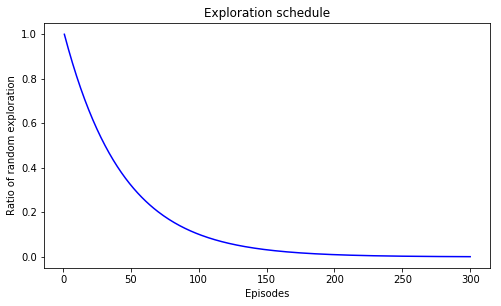

In [26]:
# Exploration Schedule ("linear" or "geometric")
exploration_schedule = "geometric"
epsilon_start = 1
epsilon_end   = 0.001

Random_Seed = 100

def choose_schedule(exploration_schedule, espilon_start, epsilon_end, episodes):
    if exploration_schedule == "linear":
        epsilon_decay = 1.2*(epsilon_end - epsilon_start)/(episodes-1)
        epsilon_sequence = [1 + epsilon_decay * entry for entry in range(episodes+1)]
        epsilon_sequence = [0 if entry < 0 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "geometric":
        epsilon_decay = np.power(epsilon_end/epsilon_start, 1./(episodes-1)) # Geometric decay
        epsilon_sequence = [epsilon_start * epsilon_decay ** entry for entry in range(episodes+1)]
    elif exploration_schedule == "entropy":
        pass
    else:
        print("ERROR: Unrecognized choice of exploration schedule.")
        
    # Plotting exploration schedule
    plt.figure(figsize=(8,4.5))
    x_series = np.array(range(1,episodes+1))
    y_series = epsilon_sequence[0:episodes]
    plt.plot(x_series, y_series, '-b')
    plt.xlabel('Episodes')
    plt.ylabel('Ratio of random exploration')
    plt.title('Exploration schedule')
    plt.show()
    return(epsilon_sequence)

epsilon_sequence = choose_schedule(exploration_schedule, epsilon_start, epsilon_end, episodes)

In [2]:
Single_Cross_Straight_MultiDQN_Agents =\
MasterDQN_Agent(model_name, 
                vissim_working_directory, 
                sim_length, 
                Single_Cross_Straight_dictionary,
                'default_actions',
                gamma, alpha, agent_type, memory_size, PER_activated, 
                batch_size, copy_weights_frequency, epsilon_sequence,
                Random_Seed = Random_Seed, timesteps_per_second = 1, 
                Session_ID = Session_ID, verbose = True)


NameError: name 'MasterDQN_Agent' is not defined

In [28]:
#Single_Cross_Straight_MultiDQN_Agents.prepopulate_memory()

Previous Experience: Found. Loading into agents
Previous Experience: Successfully loaded file from:
C:\Users\nwalton\OneDrive - The Alan Turing Institute\Documents\MLforFlowOptimisation\Vissim\Single_Cross_Straight\Agents_Results\DuelingDQN\Single_Cross_Straigth_DuelingDQN20c0\Agent0_PERPre_1000.p


In [26]:
Single_Cross_Straight_MultiDQN_Agents.train(episodes)

Working Directory set to: C:\Users\nwalton\OneDrive - The Alan Turing Institute\Documents\MLforFlowOptimisation\Vissim\
Generating Cache...
Failed load attempt 1/5. Re-attempting.
Working Directory set to: C:\Users\nwalton\OneDrive - The Alan Turing Institute\Documents\MLforFlowOptimisation\Vissim\
Generating Cache...
Cache generated.

****************************
*   COM Server dispatched  *
****************************

Attempting to load Model File: Single_Cross_Straight.inpx ...
Model File load process successful.
Simulation length set to 3601 seconds.
Results from Previous Simulations: Deleted. Fresh Start Available.
Fetched and containerized Network Object 

*******************************************************
*                                                     *
*                COM SETUP COMPLETE                   *
*                                                     *
*******************************************************

Random seed set in simulator. Random Seed = 10

Reducing exploration for all agents to 0.4886

Episode 32: Starting computation.
Random Seed Set to 132
Episode 32: Finished running.
Agent 0, Average Reward: -24.73
Epoch 1/1
 - 0s - loss: 671.7003
Reducing exploration for all agents to 0.4775

Episode 33: Starting computation.
Random Seed Set to 133
Episode 33: Finished running.
Agent 0, Average Reward: -29.9
Epoch 1/1
 - 0s - loss: 554.5353
Reducing exploration for all agents to 0.4665

Episode 34: Starting computation.
Random Seed Set to 134
Episode 34: Finished running.
Agent 0, Average Reward: -26.1
Epoch 1/1
 - 0s - loss: 615.3406
Reducing exploration for all agents to 0.4559

Episode 35: Starting computation.
Random Seed Set to 135
Episode 35: Finished running.
Agent 0, Average Reward: -27.1
Epoch 1/1
 - 0s - loss: 515.2579
Reducing exploration for all agents to 0.4455

Episode 36: Starting computation.
Random Seed Set to 136
Episode 36: Finished running.
Agent 0, Average Reward: -25.63
Epoch 1/1
 - 0s - loss: 442.4352
Reducing

Random Seed Set to 170
Episode 70: Finished running.
Agent 0, Average Reward: -24.88
Epoch 1/1
 - 0s - loss: 445.5176
Weights succesfully copied to Target model for Agent 0.
Reducing exploration for all agents to 0.1985

Episode 71: Starting computation.
Random Seed Set to 171
Episode 71: Finished running.
Agent 0, Average Reward: -26.35
Epoch 1/1
 - 0s - loss: 437.8929
Reducing exploration for all agents to 0.1939

Episode 72: Starting computation.
Random Seed Set to 172
Episode 72: Finished running.
Agent 0, Average Reward: -23.09
Epoch 1/1
 - 0s - loss: 642.1141
Reducing exploration for all agents to 0.1895

Episode 73: Starting computation.
Random Seed Set to 173
Episode 73: Finished running.
Agent 0, Average Reward: -25.43
Epoch 1/1
 - 0s - loss: 491.7093
Reducing exploration for all agents to 0.1852

Episode 74: Starting computation.
Random Seed Set to 174
Episode 74: Finished running.
Agent 0, Average Reward: -25.7
Epoch 1/1
 - 0s - loss: 483.3109
Reducing exploration for all ag

Reducing exploration for all agents to 0.0825

Episode 109: Starting computation.
Random Seed Set to 209
Episode 109: Finished running.
Agent 0, Average Reward: -23.73
Epoch 1/1
 - 0s - loss: 659.5028
Reducing exploration for all agents to 0.0806

Episode 110: Starting computation.
Random Seed Set to 210
Episode 110: Finished running.
Agent 0, Average Reward: -21.55
Epoch 1/1
 - 0s - loss: 268.8184
Weights succesfully copied to Target model for Agent 0.
Reducing exploration for all agents to 0.0788

Episode 111: Starting computation.
Random Seed Set to 211
Episode 111: Finished running.
Agent 0, Average Reward: -25.68
Epoch 1/1
 - 0s - loss: 558.3965
Reducing exploration for all agents to 0.077

Episode 112: Starting computation.
Random Seed Set to 212
Episode 112: Finished running.
Agent 0, Average Reward: -22.58
Epoch 1/1
 - 0s - loss: 520.2795
Reducing exploration for all agents to 0.0752

Episode 113: Starting computation.
Random Seed Set to 213
Episode 113: Finished running.
Agent

Reducing exploration for all agents to 0.0343

Episode 147: Starting computation.
Random Seed Set to 247
Episode 147: Finished running.
Agent 0, Average Reward: -23.66
Epoch 1/1
 - 0s - loss: 264.8424
Reducing exploration for all agents to 0.0335

Episode 148: Starting computation.
Random Seed Set to 248
Episode 148: Finished running.
Agent 0, Average Reward: -24.44
Epoch 1/1
 - 0s - loss: 372.8139
Reducing exploration for all agents to 0.0327

Episode 149: Starting computation.
Random Seed Set to 249
Episode 149: Finished running.
Agent 0, Average Reward: -21.15
Epoch 1/1
 - 0s - loss: 298.2141
Reducing exploration for all agents to 0.032

Episode 150: Starting computation.
Random Seed Set to 250
Episode 150: Finished running.
Agent 0, Average Reward: -23.94
Epoch 1/1
 - 0s - loss: 396.5721
Weights succesfully copied to Target model for Agent 0.
Reducing exploration for all agents to 0.0313

Episode 151: Starting computation.
Random Seed Set to 251
Episode 151: Finished running.
Agent

Reducing exploration for all agents to 0.0143

Episode 185: Starting computation.
Random Seed Set to 285
Episode 185: Finished running.
Agent 0, Average Reward: -27.83
Epoch 1/1
 - 0s - loss: 500.8638
Reducing exploration for all agents to 0.0139

Episode 186: Starting computation.
Random Seed Set to 286
Episode 186: Finished running.
Agent 0, Average Reward: -23.23
Epoch 1/1
 - 0s - loss: 344.7976
Reducing exploration for all agents to 0.0136

Episode 187: Starting computation.
Random Seed Set to 287
Episode 187: Finished running.
Agent 0, Average Reward: -26.88
Epoch 1/1
 - 0s - loss: 257.4502
Reducing exploration for all agents to 0.0133

Episode 188: Starting computation.
Random Seed Set to 288
Episode 188: Finished running.
Agent 0, Average Reward: -24.13
Epoch 1/1
 - 0s - loss: 293.2469
Reducing exploration for all agents to 0.013

Episode 189: Starting computation.
Random Seed Set to 289
Episode 189: Finished running.
Agent 0, Average Reward: -26.5
Epoch 1/1
 - 0s - loss: 358.45

Reducing exploration for all agents to 0.0059

Episode 223: Starting computation.
Random Seed Set to 323
Episode 223: Finished running.
Agent 0, Average Reward: -27.06
Epoch 1/1
 - 0s - loss: 286.3363
Reducing exploration for all agents to 0.0058

Episode 224: Starting computation.
Random Seed Set to 324
Episode 224: Finished running.
Agent 0, Average Reward: -24.51
Epoch 1/1
 - 0s - loss: 195.6272
Reducing exploration for all agents to 0.0057

Episode 225: Starting computation.
Random Seed Set to 325
Episode 225: Finished running.
Agent 0, Average Reward: -24.61
Epoch 1/1
 - 0s - loss: 217.3148
Reducing exploration for all agents to 0.0055

Episode 226: Starting computation.
Random Seed Set to 326
Episode 226: Finished running.
Agent 0, Average Reward: -28.3
Epoch 1/1
 - 0s - loss: 250.2586
Reducing exploration for all agents to 0.0054

Episode 227: Starting computation.
Random Seed Set to 327
Episode 227: Finished running.
Agent 0, Average Reward: -26.94
Epoch 1/1
 - 0s - loss: 262.9

Random Seed Set to 361
Episode 261: Finished running.
Agent 0, Average Reward: -25.86
Epoch 1/1
 - 0s - loss: 280.8742
Reducing exploration for all agents to 0.0024

Episode 262: Starting computation.
Random Seed Set to 362
Episode 262: Finished running.
Agent 0, Average Reward: -26.33
Epoch 1/1
 - 0s - loss: 294.8068
Reducing exploration for all agents to 0.0024

Episode 263: Starting computation.
Random Seed Set to 363
Episode 263: Finished running.
Agent 0, Average Reward: -25.89
Epoch 1/1
 - 0s - loss: 238.5182
Reducing exploration for all agents to 0.0023

Episode 264: Starting computation.
Random Seed Set to 364
Episode 264: Finished running.
Agent 0, Average Reward: -27.9
Epoch 1/1
 - 0s - loss: 367.2678
Reducing exploration for all agents to 0.0022

Episode 265: Starting computation.
Random Seed Set to 365
Episode 265: Finished running.
Agent 0, Average Reward: -27.66
Epoch 1/1
 - 0s - loss: 460.1028
Reducing exploration for all agents to 0.0022

Episode 266: Starting computati

Episode 300: Finished running.
Agent 0, Average Reward: -28.4
Epoch 1/1
 - 0s - loss: 330.5846
Weights succesfully copied to Target model for Agent 0.
Saving architecture, weights and optimizer state for agent-0
Dumping agent-0 memory into pickle file
Dumping Training Results into pickle file.
Dumping Loss Results into pickle file.
Reducing exploration for all agents to 0.001

Episode 301: Starting computation.


In [27]:
#Single_Cross_Straight_MultiDQN_Agents.save(300)

Saving architecture, weights and optimizer state for agent-0
Dumping agent-0 memory into pickle file
Dumping Training Results into pickle file.
Dumping Loss Results into pickle file.


In [36]:
Single_Cross_Straight_MultiDQN_Agents.load(300,False) 

Loading Pre-Trained Agent 0, Architecture, Optimizer and Memory.
Items successfully loaded.


In [17]:
Single_Cross_Straight_MultiDQN_Agents.demo(vissim=vissim)

Random seed set in simulator. Random Seed = 100
Deploying Network Parser...
Successful Network Crawl: Identified SignalControllers, Links, Lanes and Vehicle Inputs.

Setting Simulation mode to: demo
Starting Deployments of Signal Control Units...
SCUs successfully deployed. Elapsed time 0.43 seconds.



In [38]:
data = []    

End_of_simulation = 3600
no_of_simulations = 1
demands = [200, 400, 600, 800, 1000, 1200]

vissim.Simulation.Stop()
Vissim = vissim
Vissim.Graphics.CurrentNetworkWindow.SetAttValue("QuickMode",1)
Vissim.SuspendUpdateGUI()
Vissim.Simulation.SetAttValue('SimPeriod', End_of_simulation)
Vissim.Simulation.SetAttValue('UseMaxSimSpeed', True)

for demand in demands :
    for simRun in Vissim.Net.SimulationRuns:
        Vissim.Net.SimulationRuns.RemoveSimulationRun(simRun)
    
    for i in range(10):
        Single_Cross_Straight_dictionary['demand'][i] = [demand,demand,demand,demand]
    
        Single_Cross_Straight_MultiDQN_Agents =\
        MasterDQN_Agent(model_name, 
                        vissim_working_directory, 
                        sim_length, 
                        Single_Cross_Straight_dictionary,
                        'default_actions',
                        gamma, alpha, agent_type, memory_size, PER_activated, 
                        batch_size, copy_weights_frequency, epsilon_sequence,
                        Random_Seed = Random_Seed, timesteps_per_second = 1, 
                        Session_ID = Session_ID, verbose = True)

    
        Single_Cross_Straight_MultiDQN_Agents.load(300,False) 
    
        Single_Cross_Straight_MultiDQN_Agents.test(vissim=Vissim)
    
    data.append([demand, Vissim.Net.DelayMeasurements.GetMultiAttValues('VehDelay(Avg,Avg,All)')])
    print(data[-1]) 

INTERSECTION 0: SETTING UP AGENT
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           (None, 5)            0                                            
__________________________________________________________________________________________________
dense_96 (Dense)                (None, 24)           144         input_17[0][0]                   
__________________________________________________________________________________________________
dense_97 (Dense)                (None, 24)           600         dense_96[0][0]                   
__________________________________________________________________________________________________
dense_100 (Dense)               (None, 24)           600         dense_97[0][0]                   
____________________________________________________________________________

KeyboardInterrupt: 

In [ ]:
Single_Cross_Straight_MultiDQN_Agents.test(vissim=Vissim)

Random seed set in simulator. Random Seed = 100
Deploying Network Parser...
Successful Network Crawl: Identified SignalControllers, Links, Lanes and Vehicle Inputs.

Setting Simulation mode to: test
Starting Deployments of Signal Control Units...
SCUs successfully deployed. Elapsed time 0.16 seconds.



In [1]:
Vissim.Net.DelayMeasurements.GetMultiAttValues('VehDelay(Avg,Avg,All)')

NameError: name 'Vissim' is not defined